In [1]:
import pandas as pd
import sys

path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
path_data = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/'

In [2]:
tweets = pd.read_parquet(path_data + "tweets.parquet", engine="fastparquet")
tweets.head()

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count
0,1221739084449832960,1221739084449832960,Mon Jan 27 10:17:51 +0000 2020,241972508,planetpaul65,False,Sun Jan 23 16:31:07 +0000 2011,La Memoria è l’unico vaccino contro l’indiffer...,"<a href=""http://twitter.com/download/android"" ...",None,...,None,"[{'text': 'GiornatadellaMemoria2020', 'indices...",[],"[{'screen_name': 'isentinelli', 'name': '@isen...",[],[],"[{'id': 1221708229090127872, 'id_str': '122170...",NaN,NaN,NaN
1,1221737155380293640,1221737155380293640,Mon Jan 27 10:10:11 +0000 2020,1179711277,Grace_1207,False,Thu Feb 14 16:37:35 +0000 2013,"Oggi sono arrivati loro, 3 femminucce e 1 masc...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,None,[],[],"[{'screen_name': 'LidaSezOlbia', 'name': 'Lida...",[],[],[],NaN,NaN,NaN
2,1221730009989120001,1221730009989120001,Mon Jan 27 09:41:47 +0000 2020,115121530,MarisaMinervini,False,Wed Feb 17 17:40:09 +0000 2010,L'indifferenza è più colpevole della violenza ...,"<a href=""http://twitter.com/download/android"" ...",None,...,None,[],[],"[{'screen_name': 'milio967', 'name': 'Εμιλιο ♌...",[],[],[],NaN,NaN,NaN
3,1221737654909382662,1221737654909382662,Mon Jan 27 10:12:10 +0000 2020,589884969,LecceSette,False,Fri May 25 08:09:46 +0000 2012,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,...,None,[],[],[],"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],[],NaN,NaN,NaN
4,1221728980203724801,1221728980203724801,Mon Jan 27 09:37:42 +0000 2020,908731428124397568,arual812,False,Fri Sep 15 16:37:10 +0000 2017,"""Coltivare la Memoria è ancora oggi un vaccino...","<a href=""http://twitter.com/download/android"" ...",None,...,None,[],[],"[{'screen_name': 'Annalisa3073', 'name': 'Anna...",[],[],[],NaN,NaN,NaN


In [3]:
tweets = tweets[["created_at","hashtags","user_screen_name","urls"]]

In [4]:
lst_dates = []
for i in tweets["created_at"]:
    lst_dates.append(utils.process_datetime(i))
tweets["created_at"] = lst_dates
del lst_dates

In [10]:
lst_hashtags = utils.hashtag_process_list(list(tweets["hashtags"]))
tweets["hashtags"] = lst_hashtags
del lst_hashtags

In [17]:
hs_count = []
from tqdm.notebook import tqdm
for i in tqdm(tweets.itertuples()):
    if i.hashtags != "[]":
        for j in i.hashtags:
            hs_count.append((j.lower(),i.created_at))
hs_count

[('giornatadellamemoria2020', '2020-01-27'),
 ('nonpossoscordare', '2020-01-27'),
 ('giornatadellamemoria2020', '2020-01-27'),
 ('giornatadellamemoria', '2020-01-27'),
 ('casalettori', '2020-01-27'),
 ('nonpossoscordare', '2020-01-27'),
 ('giornatadellamemoria2020', '2020-01-27'),
 ('holocaustmemorialday', '2020-01-27'),
 ('lilianasegre', '2020-01-27'),
 ('giornatadellamemoria', '2020-01-27'),
 ('shoah', '2020-01-27'),
 ('giornatadellamemoria2020', '2020-01-27'),
 ('27gennaio', '2020-01-27'),
 ('giornatadellamemoria2020', '2020-01-27'),
 ('lilianasegre', '2020-01-27'),
 ('leggolamemoria', '2020-01-27'),
 ('giornatadellamemoria2020', '2020-01-27'),
 ('27gennaio', '2020-01-27'),
 ('salalettura', '2020-01-27'),
 ('profilassivaccinale', '2020-01-27'),
 ('nonpossoscordare', '2020-01-27'),
 ('giornatadellamemoria2020', '2020-01-27'),
 ('elezioniregionali2020', '2020-01-27'),
 ('27gennaio', '2020-01-27'),
 ('giornatadellamemoria', '2020-01-27'),
 ('weremember', '2020-01-27'),
 ('antisemitismo

In [26]:
hs = []
new_lst_name_nc = []
new_lst_dates_nc = []
new_lst_name_ds = []
new_lst_dates_ds = []
new_lst_name_in = []
new_lst_dates_in = []
lst_nc = ["nessunacorrelazione"]
lst_ds = ["dittaturasanitaria"]
lst_in = ["iononmivaccino"]
for i in hs_count:
    hs.append(i[0])
    if i[0] in lst_nc:
        new_lst_name_nc.append(i[0])
        new_lst_dates_nc.append(i[1])
    if i[0] in lst_ds:
        new_lst_name_ds.append(i[0])
        new_lst_dates_ds.append(i[1])
    if i[0] in lst_in:
        new_lst_name_in.append(i[0])
        new_lst_dates_in.append(i[1])

pd.Series(hs).value_counts().sort_values(ascending=False)
df_nc = pd.DataFrame(list(zip(new_lst_name_nc,new_lst_dates_nc)),columns=["hashtags","date"])
df_ds = pd.DataFrame(list(zip(new_lst_name_ds, new_lst_dates_ds)), columns=["hashtags", "date"])
df_in = pd.DataFrame(list(zip(new_lst_name_in, new_lst_dates_in)), columns=["hashtags", "date"])

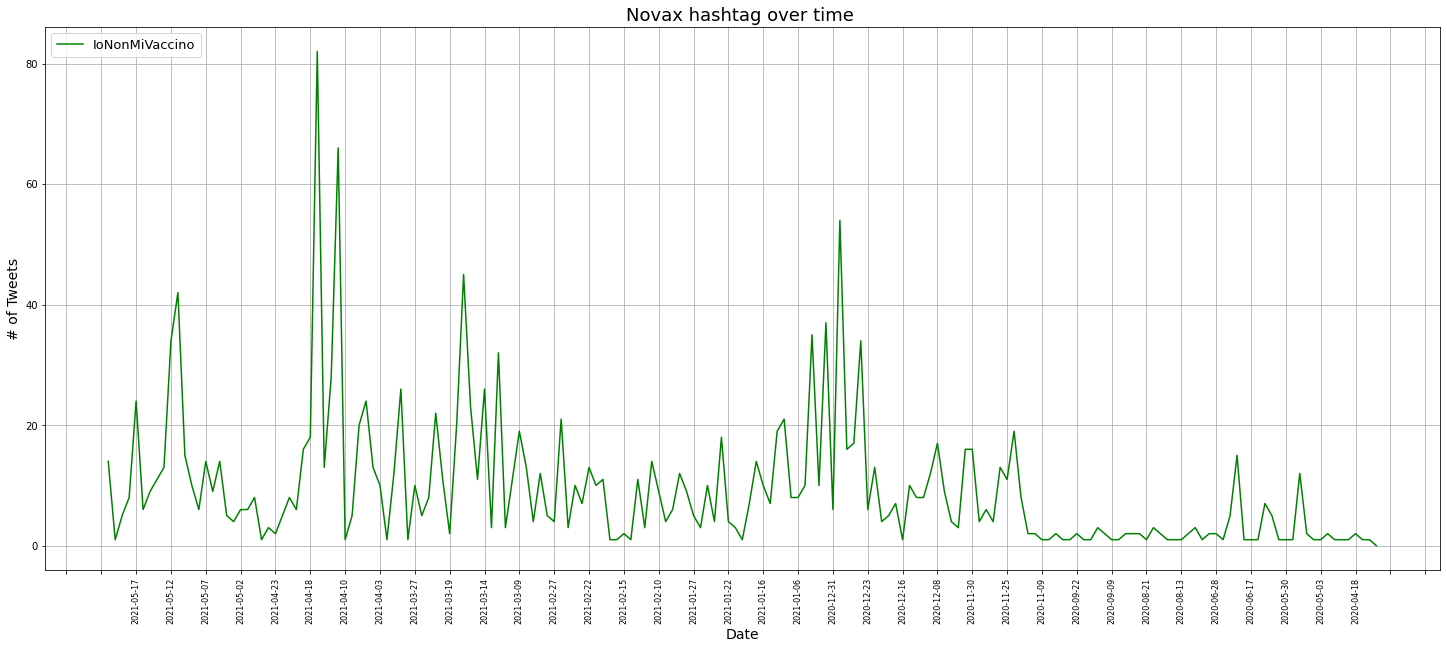

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_nc['date_tweets']= df_nc.groupby(['date'])['date'].transform('size')
df_nc_for_plot = df_nc.drop_duplicates(subset='date')
df_ds['date_tweets']= df_ds.groupby(['date'])['date'].transform('size')
df_ds_for_plot = df_ds.drop_duplicates(subset='date')
df_in['date_tweets']= df_in.groupby(['date'])['date'].transform('size')
df_in_for_plot = df_in.drop_duplicates(subset='date')
df2 = pd.DataFrame({'hashtags': ['nessunacorrelazione'],
                    'date' : ['2020-01-27'],
                    'date_tweets' : ['0']})
df_nc_for_plot = df_nc_for_plot.append(df2)
df2 = pd.DataFrame({'hashtags': ['dittaturasanitaria'],
                    'date' : ['2020-01-27'],
                    'date_tweets' : ['0']})
df_ds_for_plot = df_ds_for_plot.append(df2)
df2 = pd.DataFrame({'hashtags': ['iononmivaccino'],
                    'date' : ['2020-01-27'],
                    'date_tweets' : ['0']})
df_in_for_plot = df_in_for_plot.append(df2)

df_nc.sort_values(by=["date"], ascending=False, inplace=True)
df_ds.sort_values(by=["date"], ascending=False, inplace=True)
df_in.sort_values(by=["date"], ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Novax hashtag over time ', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('# of Tweets', fontsize=14)

# plt.plot(df_nc_for_plot['date'], df_nc_for_plot['date_tweets'], c='magenta', label='NessunaCorrelazione')
plt.plot(df_in_for_plot['date'], df_in_for_plot['date_tweets'], c='green', label='IoNonMiVaccino')
# plt.plot(df_ds_for_plot['date'], df_ds_for_plot['date_tweets'], c='blue', label='DittaturaSanitaria')

# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8)
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

In [36]:
print(len(df_in_for_plot))
print(len(df_ds_for_plot))
print(len(df_nc_for_plot))

182
203
64


In [47]:
df_ds_for_plot.tail() #2020-03-17 - 2021-05-23

,hashtags,date,date_tweets
2443,dittaturasanitaria,2021-05-17,32
2288,dittaturasanitaria,2021-05-18,6
2290,dittaturasanitaria,2021-05-19,2
2294,dittaturasanitaria,2021-05-23,4
0,dittaturasanitaria,2020-01-27,0


In [41]:
df_in_for_plot.tail() #2020-04-08 - 2021-05-23

,hashtags,date,date_tweets
1734,iononmivaccino,2021-05-17,24
1500,iononmivaccino,2021-05-18,8
1516,iononmivaccino,2021-05-21,5
1517,iononmivaccino,2021-05-22,1
1523,iononmivaccino,2021-05-23,14


In [43]:
df_nc_for_plot.tail() #2021-03-01 - 2021-05-23

,hashtags,date,date_tweets
7144,nessunacorrelazione,2021-05-17,104
7263,nessunacorrelazione,2021-05-18,120
5834,nessunacorrelazione,2021-05-21,2
5839,nessunacorrelazione,2021-05-22,4
5898,nessunacorrelazione,2021-05-23,179
